# 1 - Helper methods

In [1]:
def calculate_accuracy(answers: list[bool]) -> float:
    return sum(1 for a in answers if a) / len(answers)

In [2]:
def calculate_turns(data: dict) -> int:
    return len(data['messages'])

In [3]:
def calculate_average_assistant_text_length(data: dict) -> float:
    assistant_texts = [msg['content'] for msg in data['messages'] if msg['role'] == 'assistant']
    #if not assistant_texts:
    #    return 0.0
    return sum(len(text) for text in assistant_texts) / len(assistant_texts)

In [4]:
def calculate_average_assistant_words(data: dict) -> float:
    assistant_texts = [msg['content'] for msg in data['messages'] if msg['role'] == 'assistant']
    #if not assistant_texts:
    #    return 0.0
    return sum(len(text.split()) for text in assistant_texts) / len(assistant_texts)

# 2 - Loading & Extracting

In [5]:
import os
import pickle
base_dir = 'data'

In [6]:
#per conversation
#device_data = [] 
turns = []
text_lengths = []
#time = []
user_answers = []
all_files = []
number_of_words = []
selected_questions =[]

for filename in os.listdir(base_dir):
    if filename.endswith('.pkl'):
        file_path = os.path.join(base_dir, filename)
        #if os.path.isfile(file_path):
        with open(file_path, 'rb') as f:
            file_data = pickle.load(f)
        
        selected_questions.append(file_data["selected_question"])
        all_files.append(file_data)
        
        # Calculate above statistics
        #device_data.append(file_data["device"]) #stats on which device was used
        turns.append(calculate_turns(file_data))
        text_lengths.append(calculate_average_assistant_text_length(file_data))
        number_of_words.append(calculate_average_assistant_words(file_data))
        #time.append(calculate_time_difference(file_data))
        user_answers.append(file_data["correct_answer"])

In [7]:
from itertools import combinations

# Check for duplicates by comparing the entire 'messages' list for each file
duplicate_indices = []
for i, j in combinations(range(len(all_files)), 2):
    if all_files[i]['messages'] == all_files[j]['messages']:
        duplicate_indices.append((i, j))

if duplicate_indices:
    print("Duplicate message lists found between the following indices:")
    for pair in duplicate_indices:
        print(pair)
else:
    print("No duplicate message lists found.")

No duplicate message lists found.


## Device
Which laptop was used?

In [8]:
if False:
    import matplotlib.pyplot as plt

    plt.figure(figsize=(8, 5))
    plt.bar(*zip(*{d: device_data.count(d) for d in set(device_data)}.items()))
    plt.xlabel('Device')
    plt.ylabel('Count')
    plt.title('Number of conversations per laptop')
    plt.show()

## Question distribution

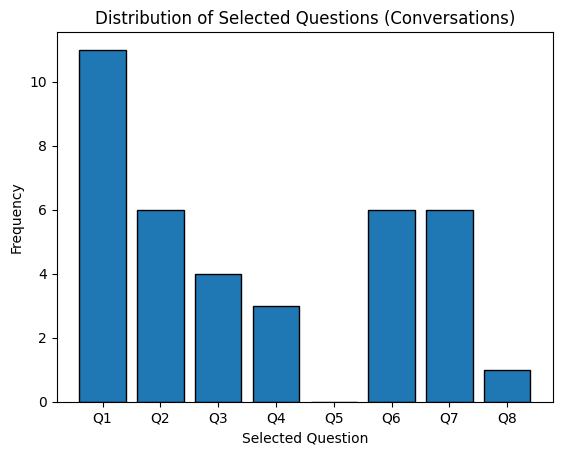

In [50]:
from collections import Counter

import matplotlib.pyplot as plt
plt.hist(selected_questions, edgecolor='black')
# Count occurrences of each question
question_order = [f"Q{i}" for i in range(1, 9)]
counts = Counter(selected_questions)
frequencies = [counts.get(q, 0) for q in question_order]

plt.clf()
plt.bar(question_order, frequencies, edgecolor='black')
plt.xlabel('Selected Question')
plt.title('Distribution of Selected Questions (Conversations)')
plt.ylabel('Frequency')
plt.show()

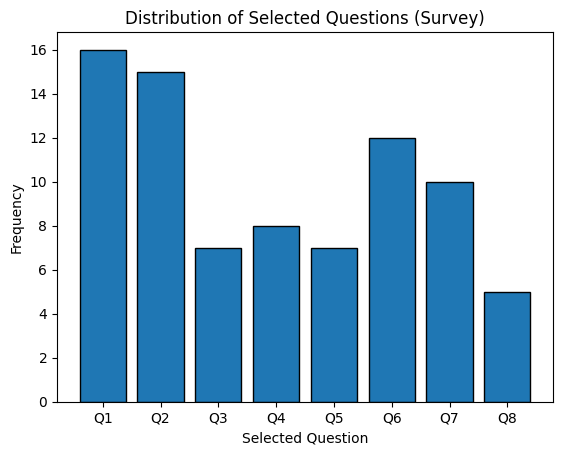

In [ ]:
import matplotlib.pyplot as plt
plt.hist(selected_questions, edgecolor='black')
# Count occurrences of each question
question_order = [f"Q{i}" for i in range(1, 9)]
counts = [16, 15, 7, 8, 7, 12, 10, 5]
#frequencies = [counts.get(q, 0) for q in question_order]

plt.clf()
plt.bar(question_order, counts, edgecolor='black')
plt.xlabel('Selected Question')
plt.title('Distribution of Selected Questions (Survey)')
plt.ylabel('Frequency')
plt.show()

# Number of Turns
Definition "Turn": "one speaker's utterance before the other speaker(s)"

In [10]:
def count_user_messages(messages: list[dict]) -> int:
    return sum(1 for msg in messages if msg.get('role') == 'user')

count_user_messages_per_file = [count_user_messages(file_data['messages']) for file_data in all_files]

In [11]:
# Check if each element in count_user_messages_per_file is equal to 2 times the corresponding element in turns
comparison = [user_msgs*2 == t for user_msgs, t in zip(count_user_messages_per_file, turns)]
print("Are all count_user_messages_per_file*2 == turns?", all(comparison))
different_indices = [i for i, equal in enumerate(comparison) if not equal]
print("Indices where they differ:", different_indices)

for i in different_indices:
    print(f"File index {i}:")
    print(all_files[i]["messages"])
    print()

Are all count_user_messages_per_file*2 == turns? False
Indices where they differ: [9, 35, 36]
File index 9:
[{'role': 'user', 'content': 'define lineraly independent'}, {'role': 'assistant', 'content': "Okay, I understand that the user is asking about linear independence and has provided a True/False question related to it, along with a counterexample. Before I give any hints or explanations, I want to make sure I understand what the user is struggling with.\n\nThe question is: If $\\{\\textbf{u},\\textbf{v}\\}$ is linearly independent and $\\{\\textbf{v},\\textbf{w}\\}$ is linearly independent, then so is $\\{\\textbf{u},\\textbf{v},\\textbf{w}\\}$.\n\nThe provided counterexample uses vectors in $\\mathbb{R}^3$:\n\\$\\mathbf u=(1,0,0),\\quad \\mathbf v=(0,1,0),\\quad \\mathbf w=(1,1,0).\n\\$\n\nThe explanation shows that $\\{\\mathbf u,\\mathbf v\\}$ and $\\{\\mathbf v,\\mathbf w\\}$ are linearly independent, but $\\{\\mathbf u,\\mathbf v,\\mathbf w\\}$ is linearly dependent because $

In [12]:
turns[9]

23

In [13]:
#Manually adjust the 9th file to include 1 more system message.
#The reason for this is that the user asks an acknowledgement of the answer, but the system is busy generating a reply.
turns[9] = turns[9] + 1

In [14]:
turns[9]

24

In [51]:
import matplotlib.pyplot as plt
import numpy as np

def plot_distribution_turns(turns: list[int], title: str, xlabel:str='Number of Turns') -> None:
    plt.figure(figsize=(8, 5))
    plt.hist(turns, edgecolor='black')
    #plt.hist(turns, bins=range(min(turns), max(turns) + 2), edgecolor='black')
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.title(title)

    # Plot average as a red dotted line
    avg_turns = sum(turns) / len(turns)
    plt.axvline(avg_turns, color='red', linestyle='dotted', linewidth=2, label=f'Average: {avg_turns:.2f}')
    plt.legend()

    median_turns = np.median(turns)
    plt.axvline(median_turns, color='green', linestyle='dotted', linewidth=2, label=f'Median: {median_turns:.2f}')
    plt.legend()
    plt.show()

In [16]:
from collections import Counter

def basic_statistics(turns: list[int]) -> None:
    turns_array = np.array(turns)
    print(f"Count: {len(turns_array)} (number of conversations)")
    print(f"Mean: {np.mean(turns_array):.2f}")
    print(f"Median: {np.median(turns_array):.2f}")
    print(f"Standard Deviation: {np.std(turns_array):.2f}")
    print(f"Min: {np.min(turns_array)}")
    print(f"Max: {np.max(turns_array)}")
    print(f"25th percentile: {np.percentile(turns_array, 25)}")
    print(f"75th percentile: {np.percentile(turns_array, 75)}")
    print(f"Unique values: {np.unique(turns_array)}")
    print(f"Distribution: {dict(sorted(Counter(turns).items()))}")

In [17]:
basic_statistics(turns)

Count: 37 (number of conversations)
Mean: 14.51
Median: 10.00
Standard Deviation: 15.03
Min: 2
Max: 72
25th percentile: 4.0
75th percentile: 16.0
Unique values: [ 2  4  6  8 10 12 14 15 16 20 24 26 34 36 60 72]
Distribution: {2: 4, 4: 6, 6: 5, 8: 2, 10: 2, 12: 3, 14: 2, 15: 1, 16: 4, 20: 1, 24: 2, 26: 1, 34: 1, 36: 1, 60: 1, 72: 1}


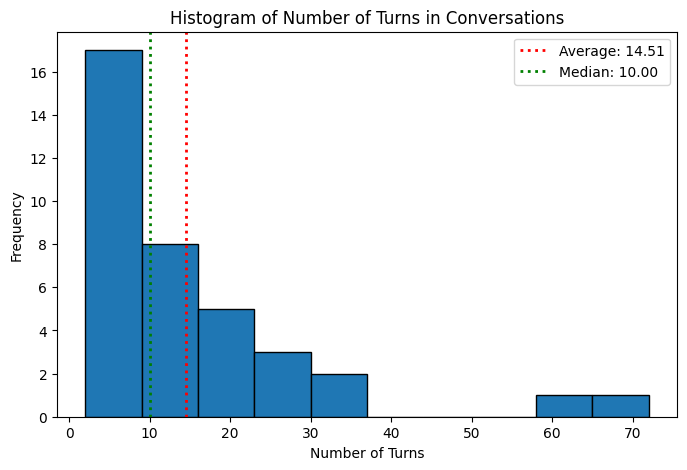

In [18]:
plot_distribution_turns(turns, title="Histogram of Number of Turns in Conversations")

In [19]:
# Find the indices of the two conversations with the most turns
top2_indices = np.argsort(turns)[-3:][::-1]  # indices of top 2, descending order

# Print the corresponding data for these conversations
for idx in top2_indices:
    print(f"Conversation {idx}:")
    print(f"Number of turns: {turns[idx]}")
    print()

Conversation 31:
Number of turns: 72

Conversation 32:
Number of turns: 60

Conversation 34:
Number of turns: 36



In [20]:
# Find the indices of the two conversations with the most turns
top2_indices = np.argsort(turns)[-4:][::-1]  # indices of top 2, descending order

# Print the corresponding data for these conversations
for idx in top2_indices:
    print(f"Conversation {idx}:")
    print(f"Number of turns: {turns[idx]}")
    print()

Conversation 31:
Number of turns: 72

Conversation 32:
Number of turns: 60

Conversation 34:
Number of turns: 36

Conversation 3:
Number of turns: 34



In [21]:
#Manual inspection of the two conversations with the most turns
#all_files[31]
#all_files[32]
#all_files[34]
#all_files[3]

### Removing outliers
Remove the two conversations with the most turns and look at the distribution of turns again

In [22]:
#only filter out the two conversations with the most turns because these are really long
#however, they are genuily trying to solve the problem, so they are not really outliers
filtered_turns = [turn for i, turn in enumerate(turns) if i not in (31, 32)]
basic_statistics(filtered_turns)

Count: 35 (number of conversations)
Mean: 11.57
Median: 10.00
Standard Deviation: 8.76
Min: 2
Max: 36
25th percentile: 4.0
75th percentile: 16.0
Unique values: [ 2  4  6  8 10 12 14 15 16 20 24 26 34 36]
Distribution: {2: 4, 4: 6, 6: 5, 8: 2, 10: 2, 12: 3, 14: 2, 15: 1, 16: 4, 20: 1, 24: 2, 26: 1, 34: 1, 36: 1}


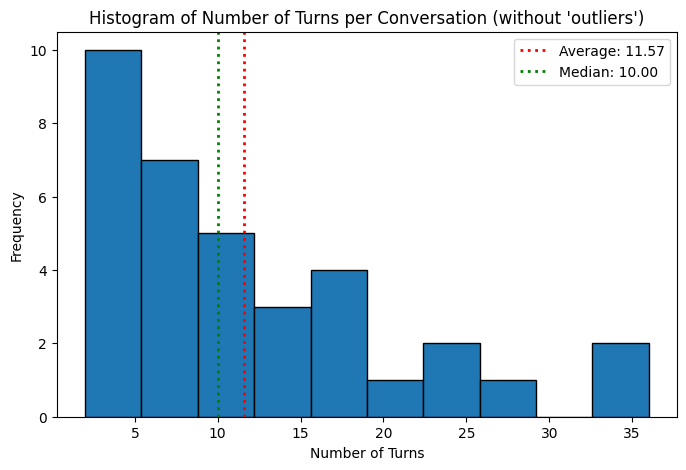

In [23]:
plot_distribution_turns(filtered_turns, title="Histogram of Number of Turns per Conversation (without \'outliers\')")

# Output text length
Average assistant text length per conversation

## Number of characters

In [24]:
basic_statistics(text_lengths)

Count: 37 (number of conversations)
Mean: 762.88
Median: 678.20
Standard Deviation: 210.67
Min: 457.125
Max: 1299.0
25th percentile: 609.1666666666666
75th percentile: 849.125
Unique values: [ 457.125       527.          538.75        550.42857143  583.41666667
  586.          587.6         592.5         597.2         609.16666667
  638.          642.5         649.05555556  649.05882353  654.75
  673.33333333  673.6         678.          678.2         721.
  737.5         747.          761.          770.07692308  774.
  782.          831.53333333  849.125       884.          895.66666667
  944.         1011.         1028.         1068.81818182 1270.
 1287.125      1299.        ]
Distribution: {457.125: 1, 527.0: 1, 538.75: 1, 550.4285714285714: 1, 583.4166666666666: 1, 586.0: 1, 587.6: 1, 592.5: 1, 597.2: 1, 609.1666666666666: 1, 638.0: 1, 642.5: 1, 649.0555555555555: 1, 649.0588235294117: 1, 654.75: 1, 673.3333333333334: 1, 673.6: 1, 678.0: 1, 678.2: 1, 721.0: 1, 737.5: 1, 747.0: 1, 7

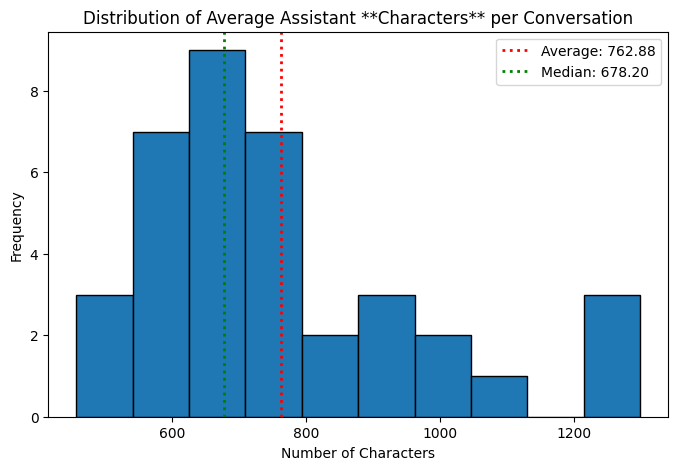

In [52]:
plot_distribution_turns(text_lengths, title="Distribution of Average Assistant **Characters** per Conversation", xlabel='Number of Characters')

## Number of words

In [26]:
basic_statistics(number_of_words)

Count: 37 (number of conversations)
Mean: 118.49
Median: 108.12
Standard Deviation: 32.10
Min: 77.75
Max: 207.0
25th percentile: 98.75
75th percentile: 136.625
Unique values: [ 77.75        81.33333333  81.86111111  84.8         88.14285714
  88.5         89.75        92.33333333  97.8         98.75
  99.88888889 100.         100.8        102.         104.33333333
 106.         108.         108.11764706 110.         111.5
 113.         114.76923077 121.5        121.71428571 123.1
 126.5        136.625      137.         142.5        145.5
 150.5        162.33333333 163.45454545 180.         205.125
 207.        ]
Distribution: {77.75: 1, 81.33333333333333: 1, 81.86111111111111: 1, 84.8: 1, 88.14285714285714: 1, 88.5: 1, 89.75: 1, 92.33333333333333: 1, 97.8: 1, 98.75: 1, 99.88888888888889: 1, 100.0: 1, 100.8: 1, 102.0: 2, 104.33333333333333: 1, 106.0: 1, 108.0: 1, 108.11764705882354: 1, 110.0: 1, 111.5: 1, 113.0: 1, 114.76923076923077: 1, 121.5: 1, 121.71428571428571: 1, 123.1: 1, 126.5:

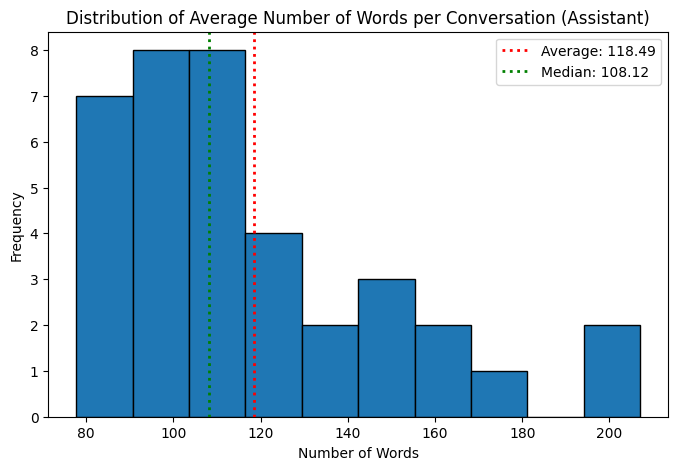

In [53]:
plot_distribution_turns(number_of_words, title="Distribution of Average Number of Words per Conversation (Assistant)", xlabel='Number of Words')

What happened with the very long one?

In [31]:
# Find the indices of the two conversations with the most turns
top3_indices = np.argsort(text_lengths)[-3:][::-1]  # indices of top 3, descending order

# Print the corresponding data for these conversations
for idx in top3_indices:
    print(f"Conversation {idx}:")
    #print(f"File: {all_files[idx]}")
    print(f"Number of turns: {turns[idx]}")
    #print(f"Device: {device_data[idx]}")
    #print(f"Correct answer: {user_answers[idx]}")
    print()

Conversation 11:
Number of turns: 2

Conversation 22:
Number of turns: 16

Conversation 28:
Number of turns: 2



In [32]:
# Manual inspection
#all_files[11] #--> only 2 turns, but the assistant text is very long
#all_files[22]
#all_files[28] #--> only 2 turns, but the assistant text is very long

What happened with the very short one?

In [33]:
# Find the indices of the two conversations with the most turns
min3_indices = np.argsort(text_lengths)[:3]

# Print the corresponding data for these conversations
for idx in min3_indices:
    print(f"Conversation {idx}:")
    #print(f"File: {all_files[idx]}")
    print(f"Number of turns: {turns[idx]}")
    #print(f"Device: {device_data[idx]}")
    print(f"Correct answer: {user_answers[idx]}")
    print()

Conversation 27:
Number of turns: 16
Correct answer: False

Conversation 20:
Number of turns: 6
Correct answer: True

Conversation 36:
Number of turns: 12
Correct answer: True



In [34]:
# Manual inspection
#all_files[27]
#all_files[20]
#all_files[24]

## Accuracy
Percentage of correct answers that were in **downloaded** conversations

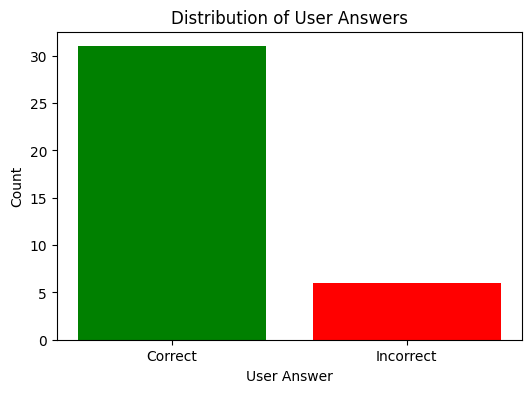

Accuracy: 31/37 = 83.78%


In [35]:
answer_counts = {True: user_answers.count(True), False: user_answers.count(False)}

plt.figure(figsize=(6, 4))
plt.bar(['Correct', 'Incorrect'], [answer_counts[True], answer_counts[False]], color=['green', 'red'])
plt.xlabel('User Answer')
plt.ylabel('Count')
plt.title('Distribution of User Answers')
plt.show()

accuracy = calculate_accuracy(user_answers)
print(f"Accuracy: {answer_counts[True]}/{answer_counts[True]+answer_counts[False]} = {accuracy:.2%}")

## Accuracy
Percentage of correct answers that were in **survey** responses

In [36]:
# Accuracy from questionaire per question

per_question = [12/(12+4), 12/(12+3), 6/(6+1), 5/(5+3), 5/(5+2), 10/(10+2), 8/(8+2), 3/(3+2)]
correct = 12+12+6+5+5+10+8+3
total = 12+4+12+3+6+1+5+3+5+2+10+2+8+2+3+2
print(f"Accuracy: {correct}/{total} = {correct/total:.2%}")

Accuracy: 61/80 = 76.25%


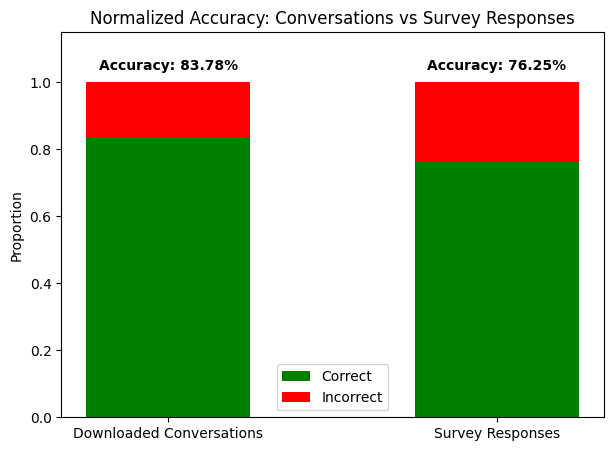

In [47]:
import numpy as np

import matplotlib.pyplot as plt

labels = ['Downloaded Conversations', 'Survey Responses']
correct_norm = [accuracy, acc]
incorrect_norm = [1 - accuracy, 1 - acc]

x = np.arange(len(labels))
width = 0.5

fig, ax = plt.subplots(figsize=(7, 5))
bars1 = ax.bar(x, correct_norm, width, label='Correct', color='green')
bars2 = ax.bar(x, incorrect_norm, width, bottom=correct_norm, label='Incorrect', color='red')

# Annotate accuracy above bars
for i, acc_val in enumerate(correct_norm):
    ax.text(x[i], 1.03, f'Accuracy: {acc_val:.2%}', ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Proportion')
ax.set_title('Normalized Accuracy: Conversations vs Survey Responses')
ax.legend()
plt.ylim(0, 1.15)
plt.show()

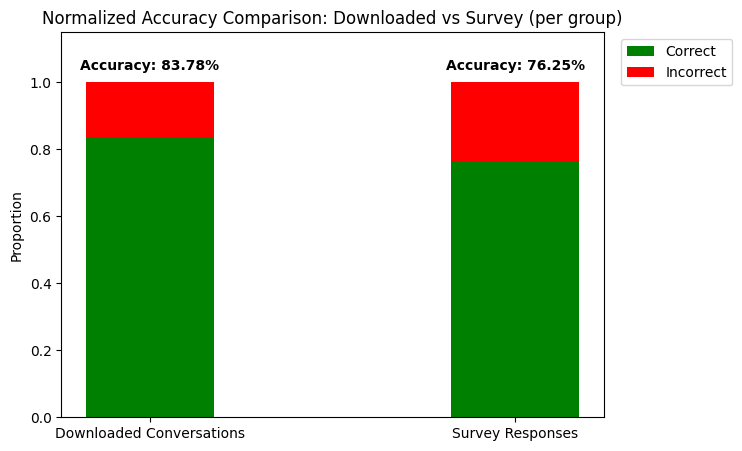

In [43]:
# Combined barplot for accuracy: downloaded conversations vs survey responses (side-by-side), normalized per group

labels = ['Downloaded Conversations', 'Survey Responses']
correct_counts = [answer_counts[True], correct]
incorrect_counts = [answer_counts[False], total - correct]

# Normalize so each group sums to 1
group_totals = [c + ic for c, ic in zip(correct_counts, incorrect_counts)]
correct_norm = [c / t for c, t in zip(correct_counts, group_totals)]
incorrect_norm = [ic / t for ic, t in zip(incorrect_counts, group_totals)]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(7, 5))
bars1 = ax.bar(x, correct_norm, width, label='Correct', color='green')
bars2 = ax.bar(x, incorrect_norm, width, bottom=correct_norm, label='Incorrect', color='red')

# Annotate accuracy above bars
for i, acc in enumerate(accuracy_values):
    ax.text(x[i], 1.03, f'Accuracy: {acc:.2%}', ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Proportion')
ax.set_title('Normalized Accuracy Comparison: Downloaded vs Survey (per group)')
ax.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
#ax.legend()
plt.ylim(0, 1.15)
plt.show()


## Relationship between \#Turns \& Text length from assistant

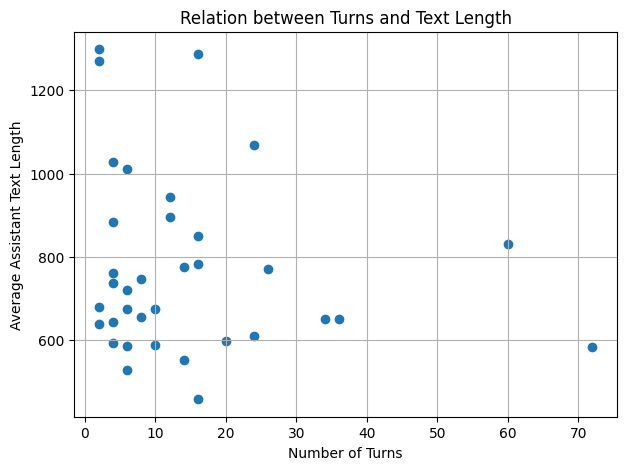

In [ ]:
#from scipy.stats import pearsonr

#corr, p_value = pearsonr(text_lengths, turns)
#print(f"Pearson correlation coefficient: {corr:.2f}")
#print(f"P-value: {p_value:.4f}")

plt.figure(figsize=(7, 5))
plt.scatter(turns, text_lengths)
plt.xlabel('Number of Turns')
plt.ylabel('Average Assistant Text Length')
plt.title('Relation between Turns and Text Length')
plt.grid(True)
plt.show()